## Networkx

In [1]:
def GetGraphMetrics(graph):
    
    graph_degree = dict(graph.degree)
    print("Graph Summary:")
    print(f"Number of nodes : {len(graph.nodes)}")
    print(f"Number of edges : {len(graph.edges)}")
    print(f"Maximum degree : {np.max(list(graph_degree.values()))}")
    print(f"Minimum degree : {np.min(list(graph_degree.values()))}")
    print(f"Average degree : {np.mean(list(graph_degree.values()))}")
    print(f"Median degree : {np.median(list(graph_degree.values()))}")
    print("")
    print("Graph Connectivity")
    try:
        print(f"Connected Components : {nx.number_connected_components(graph)}")
    except:
        print(f"Strongly Connected Components : {nx.number_strongly_connected_components(graph)}")
        print(f"Weakly Connected Components : {nx.number_weakly_connected_components(graph)}")
    print("")
    print("Graph Distance")
    print(f"Average Distance : {nx.average_shortest_path_length(graph)}")
    print(f"Diameter : {nx.algorithms.distance_measures.diameter(graph)}")
    print("")
    print("Graph Clustering")
    print(f"Transitivity : {nx.transitivity(graph)}")
    print(f"Average Clustering Coefficient : {nx.average_clustering(graph)}")
    
    
    return None

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

In [6]:
GetGraphMetrics(G)

Graph Summary:
Number of nodes : 34
Number of edges : 78
Maximum degree : 17
Minimum degree : 1
Average degree : 4.588235294117647
Median degree : 3.0

Graph Connectivity
Connected Components : 1

Graph Distance
Average Distance : 2.408199643493761
Diameter : 5

Graph Clustering
Transitivity : 0.2556818181818182
Average Clustering Coefficient : 0.5706384782076823


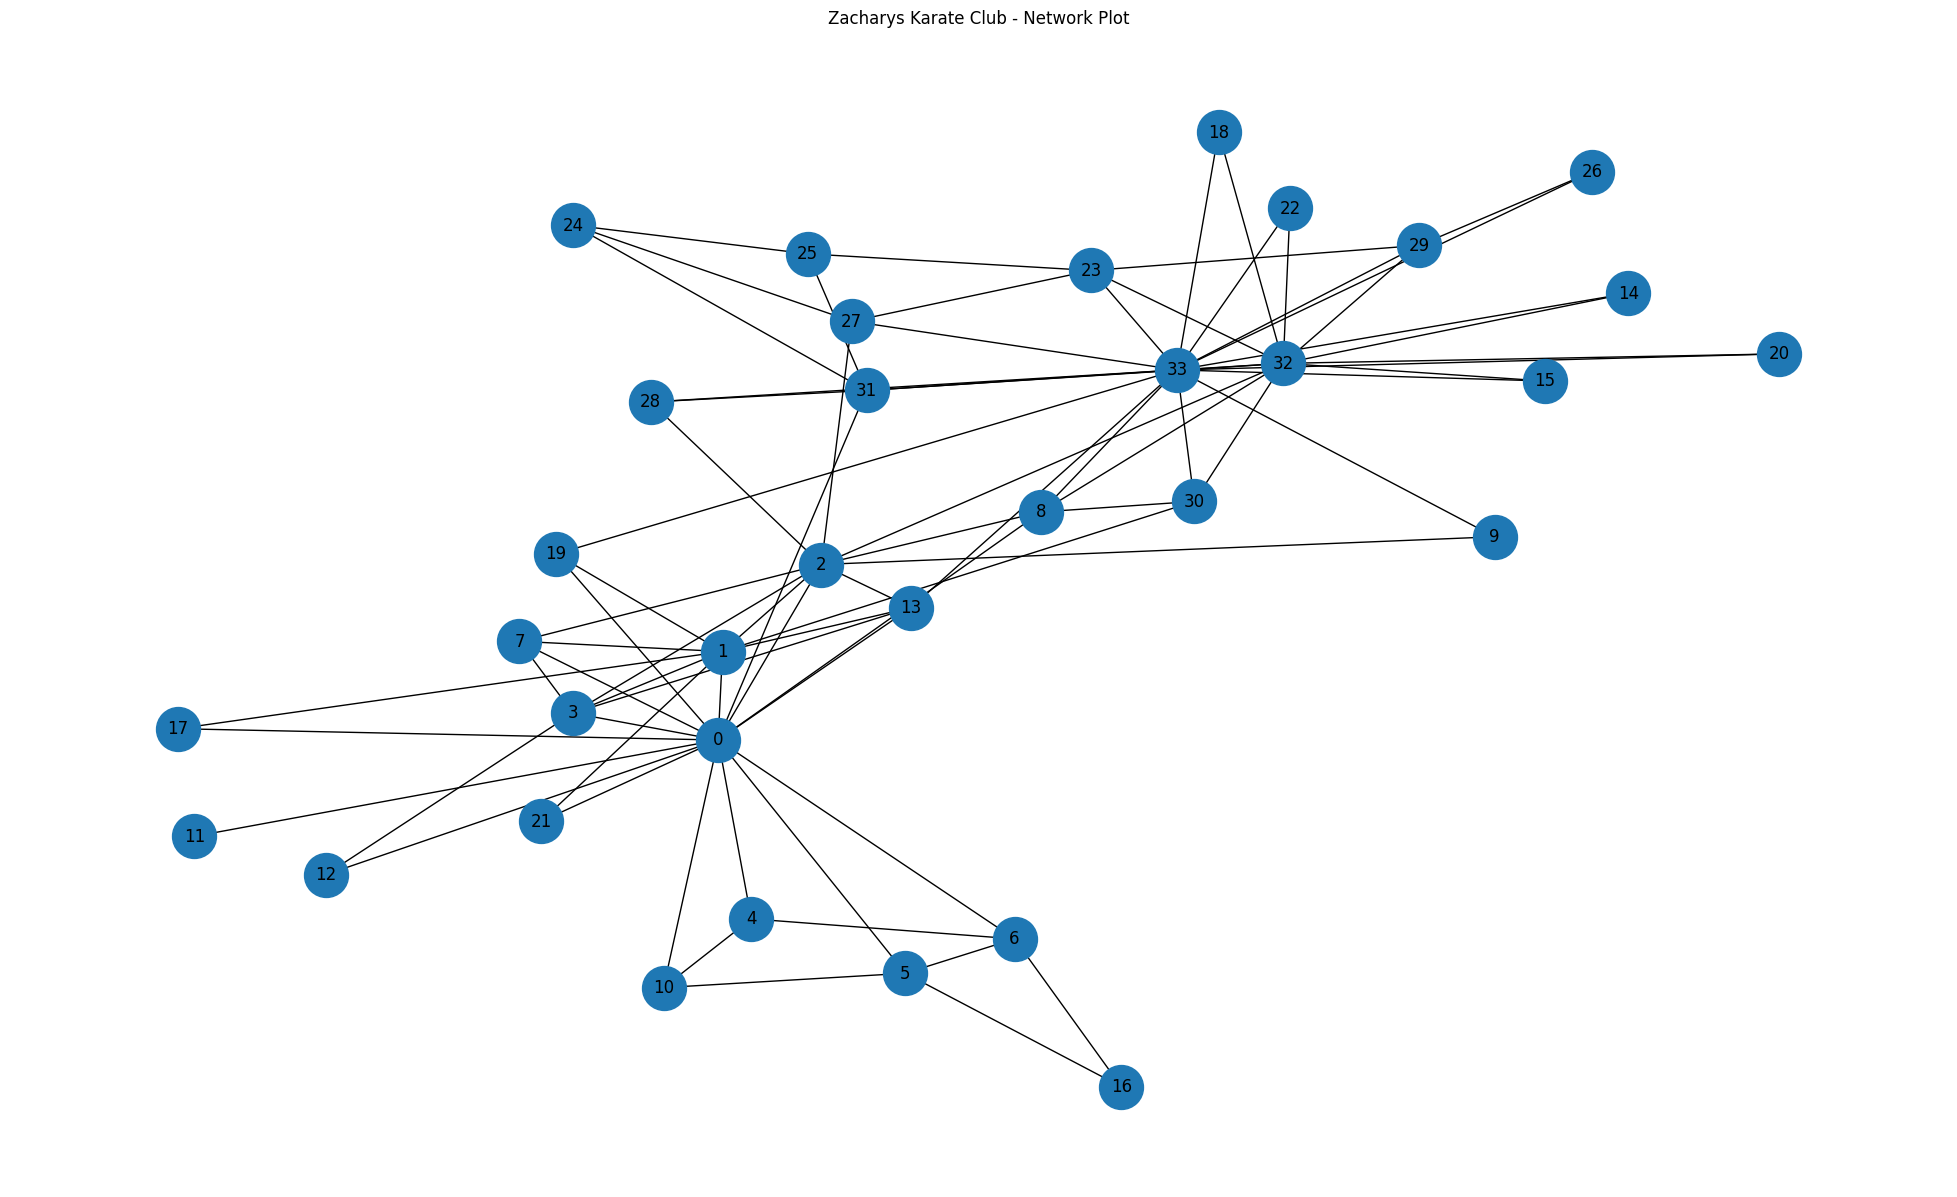

In [7]:
plt.figure(figsize=(25,15))
ax = plt.gca()
ax.set_title('Zacharys Karate Club - Network Plot')
nx.draw(G,with_labels = True, node_size=1000)

In [8]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.13903743315508021


## DeepWalk

Number of nodes (club-members) 34


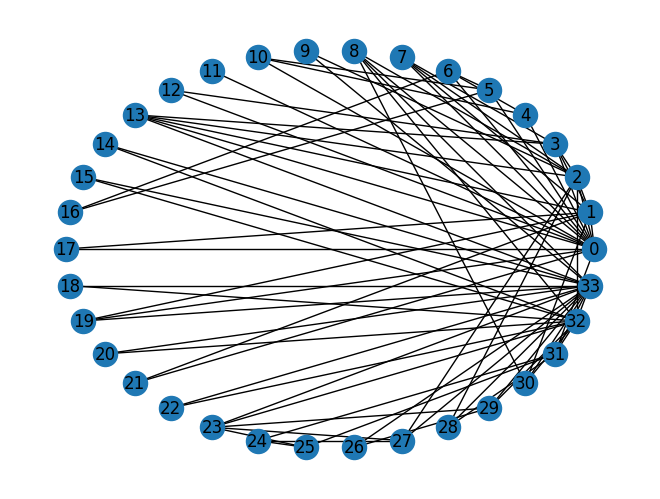

Embedding array shape (nodes x features): (34, 124)

Low dimensional embedding representaiton (nodes x 2): (34, 2)


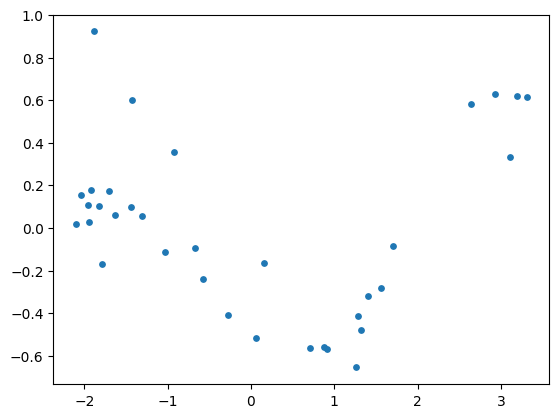

In [9]:
" Workshop on DeepWalk Algorithm using Karate Club"
import networkx as nx
from karateclub import DeepWalk 
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

G = nx.karate_club_graph() # load the Zachary's karate club graph
print('Number of nodes (club-members)', len(G.nodes))
nx.draw_circular(G, with_labels=True)
plt.show()

" Perform node embedding using DeepWalk "
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features):',embedding.shape )
print()
" Low dimensional plot of the neodes x features"

PCA_model = sklearn.decomposition.PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_embedding.shape)
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1],s=15)
plt.show()

## Node2Vec

Embedding array shape (nodes x features): (34, 124)
Low dimensional embedding representaiton (nodes x 2): (34, 2)


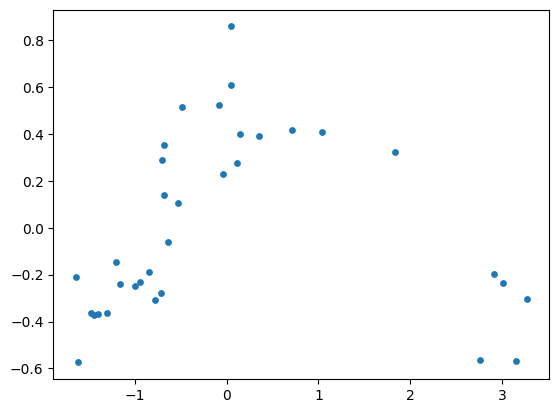

In [10]:
from karateclub import  Node2Vec

" Perform node embedding using DeepWalk "
N2Vec_model = Node2Vec(walk_number=10, walk_length=80,
                       p=.6, q=.4, dimensions=124)
N2Vec_model.fit(G)
embedding = N2Vec_model.get_embedding()
print('Embedding array shape (nodes x features):',embedding.shape )

PCA_model = sklearn.decomposition.PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_embedding.shape)
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1],s=15)
plt.show()

In [2]:
import torch
from torch_geometric.datasets import Planetoid # The citation network datasets “Cora”, “CiteSeer” and “PubMed” 
from torch_geometric.nn import Node2Vec # Import Node2Vec Model
from torch_geometric.utils.convert import from_networkx
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
data = from_networkx(G)

from torch_geometric.transforms import RandomLinkSplit

transform = RandomLinkSplit(is_undirected=True)
train_data, val_data, test_data = transform(data)

" **************** CONSTRUCT THE MODEL  ********************"
Node2Vec_model = Node2Vec(train_data.edge_index, embedding_dim=128, walk_length=20,
                     context_size=10, walks_per_node=10,
                     num_negative_samples=1, p=1, q=1, sparse=True).to(device)

loader = Node2Vec_model.loader(batch_size=128, shuffle=True, num_workers=4) # For batch training
optimizer = torch.optim.SparseAdam(list(Node2Vec_model.parameters()), #List of parameters
                                   lr = 0.01) # Learning Rate

In [4]:
" **************** TRAIN FUNCTION ********************"
def train():
    Node2Vec_model.train() # Set training as true for the model
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad() # reset of gradient of all variables
        loss = Node2Vec_model.loss(pos_rw , neg_rw)
        loss.backward()
        optimizer.step()
        total_loss =+ loss.item()
    return total_loss / len(loader)      


" **************** GET EMBEDDING  ********************"
EPOCHS = 30
for epoch in range(1, EPOCHS):
    loss = train()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')


Epoch: 01, Loss: 9.7131
Epoch: 02, Loss: 9.0345
Epoch: 03, Loss: 8.8253
Epoch: 04, Loss: 8.3805
Epoch: 05, Loss: 7.9318
Epoch: 06, Loss: 7.6526
Epoch: 07, Loss: 7.2906
Epoch: 08, Loss: 6.9518
Epoch: 09, Loss: 6.6287
Epoch: 10, Loss: 6.3319
Epoch: 11, Loss: 6.0933
Epoch: 12, Loss: 5.9905
Epoch: 13, Loss: 5.6472
Epoch: 14, Loss: 5.4293
Epoch: 15, Loss: 5.4264
Epoch: 16, Loss: 5.2531
Epoch: 17, Loss: 4.9344
Epoch: 18, Loss: 4.8846
Epoch: 19, Loss: 4.8077
Epoch: 20, Loss: 4.5163
Epoch: 21, Loss: 4.3728
Epoch: 22, Loss: 4.4271
Epoch: 23, Loss: 4.3542
Epoch: 24, Loss: 4.3446
Epoch: 25, Loss: 4.2273
Epoch: 26, Loss: 4.1716
Epoch: 27, Loss: 4.0347
Epoch: 28, Loss: 4.0056
Epoch: 29, Loss: 3.9123


# Torch Geometric

In [52]:
import torch
from torch_geometric.utils.convert import from_networkx

G = nx.karate_club_graph()
pyg_graph = from_networkx(G)

In [53]:
print(G.number_of_edges())
print(G.number_of_nodes())

78
34


In [54]:
pyg_graph

Data(edge_index=[2, 156], club=[34], weight=[156], name='Zachary's Karate Club', num_nodes=34)

## Load from Torch Geometric

In [23]:
from torch_geometric.datasets import KarateClub
dataset = KarateClub()
print("Dataset:", dataset)
print("# Graphs:", len(dataset))
print("# Features:", dataset.num_features)
print("# Classes:", dataset.num_classes)

Dataset: KarateClub()
# Graphs: 1
# Features: 34
# Classes: 4


In [24]:
data = dataset[0]
print(data)
print("Training nodes:", data.train_mask.sum().item())
print("Is directed:", data.is_directed())

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Training nodes: 4
Is directed: False


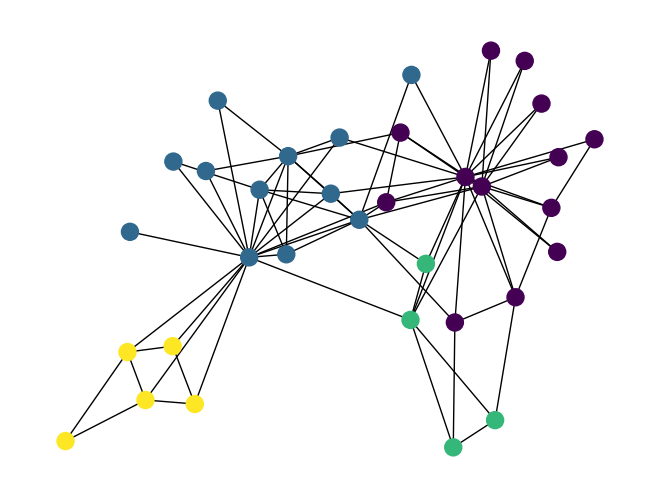

In [25]:
from torch_geometric.utils import to_networkx
G = to_networkx(data, to_undirected=True)
nx.draw(G, node_color=data.y, node_size=150)

In [90]:
data['y']

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])